In [97]:
from sklearn.datasets import load_linnerud
import numpy as np
import mglearn
import mglearn.datasets
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [98]:
linnerud = load_linnerud()
print("Ключи linnerud(): \n{}".format(linnerud.keys()))

Ключи linnerud(): 
dict_keys(['data', 'feature_names', 'target', 'target_names', 'frame', 'DESCR', 'data_filename', 'target_filename', 'data_module'])


In [99]:
print("Форма массива data для набора linnerud: {}".format(linnerud.data.shape))

Форма массива data для набора linnerud: (20, 3)


In [100]:
import numpy as np

hist, bin_edges = np.histogram(linnerud.target, bins=10)

class_counts = {f"Bin {i+1}": count for i, count in enumerate(hist)}

print("Количество примеров для каждого класса:\n{}".format(class_counts))

Количество примеров для каждого класса:
{'Bin 1': 28, 'Bin 2': 12, 'Bin 3': 0, 'Bin 4': 0, 'Bin 5': 1, 'Bin 6': 4, 'Bin 7': 7, 'Bin 8': 6, 'Bin 9': 1, 'Bin 10': 1}


In [101]:
feature_names = linnerud.feature_names
print("Feature names:")
print(feature_names)

Feature names:
['Chins', 'Situps', 'Jumps']


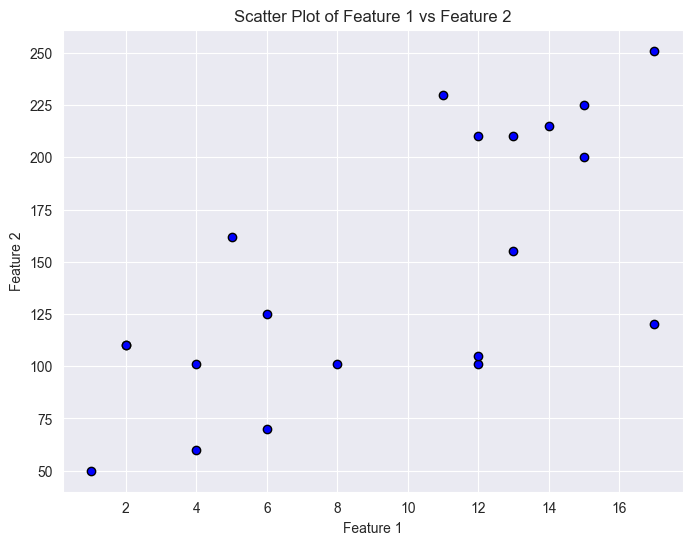

In [102]:
linnerud = load_linnerud()

X = linnerud.data

feature_1 = X[:, 0]
feature_2 = X[:, 1]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(feature_1, feature_2, c='b', marker='o', edgecolors='k')
plt.title('Scatter Plot of Feature 1 vs Feature 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

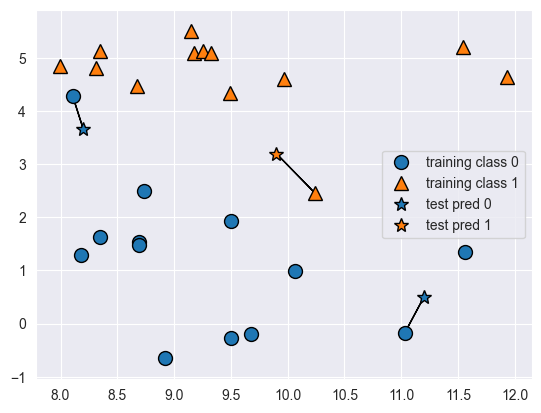

In [103]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

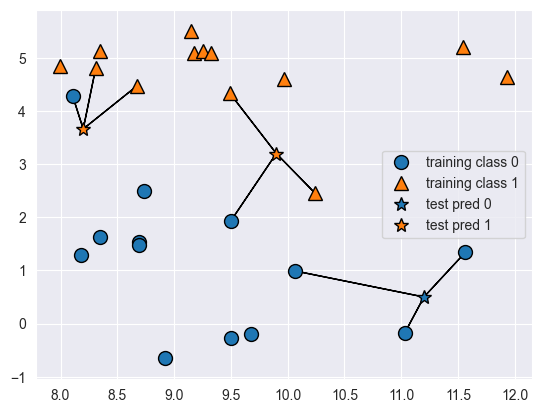

In [104]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

<h1>KNeighborsRegressor</h1>

In [105]:

X = linnerud.data
y = linnerud.target

selected_feature_index = 0
X_selected = X[:, selected_feature_index]

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=0)

reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train.reshape(-1, 1), y_train)

# Print the predictions for the test data
predictions = reg.predict(X_test.reshape(-1, 1))
print("Test Set Predictions:\n{}".format(predictions))

Test Set Predictions:
[[165.66666667  34.          55.33333333]
 [201.66666667  39.66666667  53.33333333]
 [201.66666667  39.66666667  53.33333333]
 [165.66666667  34.          55.33333333]
 [165.66666667  34.          55.33333333]
 [185.66666667  36.66666667  60.66666667]]


<h1>Линейная регрессия</h1>

In [106]:
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(linnerud.data, linnerud.target, random_state=42)
regressor = LinearRegression().fit(X_train, y_train)

print("Training set R^2: {:.3f}".format(regressor.score(X_train, y_train)))
print("Test set R^2: {:.3f}".format(regressor.score(X_test, y_test)))

Training set R^2: 0.350
Test set R^2: -0.692


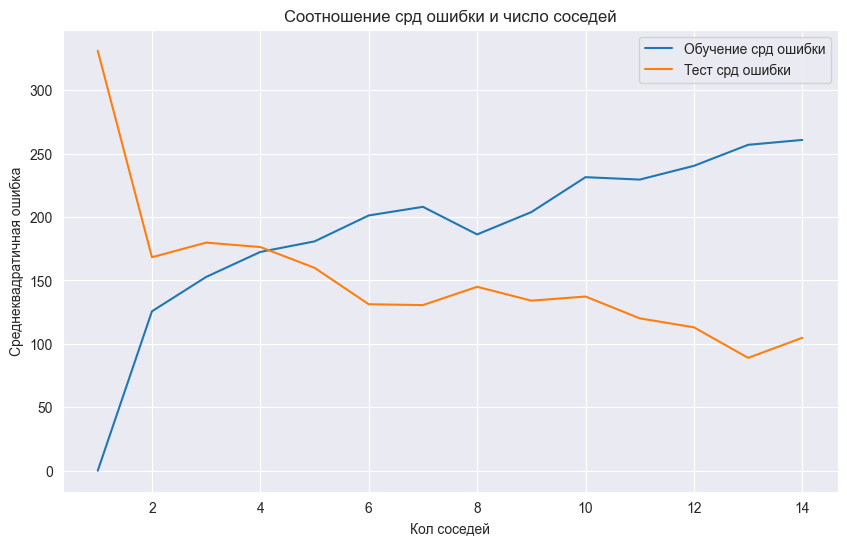

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

n_neighbors_values = range(1, 15)

train_mse = []
test_mse = []

for n_neighbors in n_neighbors_values:
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)

    train_preds = knn.predict(X_train)
    train_mse_value = np.mean((train_preds - y_train) ** 2)
    train_mse.append(train_mse_value)

    test_preds = knn.predict(X_test)
    test_mse_value = np.mean((test_preds - y_test) ** 2)
    test_mse.append(test_mse_value)

plt.figure(figsize=(10, 6))
plt.plot(n_neighbors_values, train_mse, label="Обучение срд ошибки")
plt.plot(n_neighbors_values, test_mse, label="Тест срд ошибки")
plt.xlabel("Кол соседей")
plt.ylabel("Среднеквадратичная ошибка")
plt.legend()
plt.title("Соотношение срд ошибки и число соседей")
plt.grid(True)
plt.show()

<h1>Гребневая модель регрессии Ridge</h1>

In [108]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge.score(X_test, y_test)))

Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


In [109]:

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge10.score(X_test, y_test)))


Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.67


In [110]:
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(ridge001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(ridge001.score(X_test, y_test)))


Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68


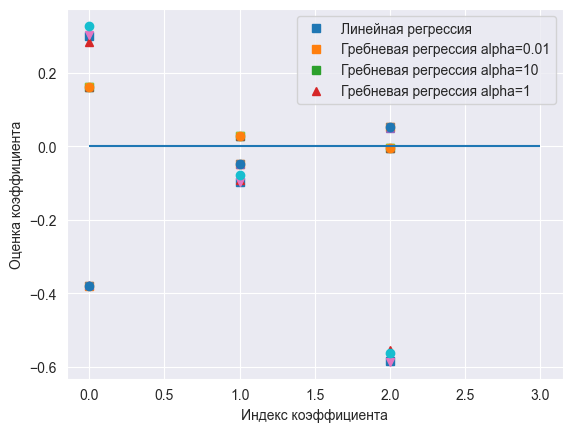

In [111]:
plt.plot(ridge.coef_, 's', label="Гребневая регрессия alpha=1")
plt.plot(ridge10.coef_, '^', label="Гребневая регрессия alpha=10")
plt.plot(ridge001.coef_, 'v', label="Гребневая регрессия alpha=0.01")
plt.plot(regressor.coef_, 'o', label="Линейная регрессия")

# Отображение только уникальных меток в легенде
handles, labels = plt.gca().get_legend_handles_labels()
labels = list(set(labels))
plt.legend(handles, labels)

plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.hlines(0, 0, len(regressor.coef_))
plt.show()


<h1> Лассо </h1>

In [112]:
from sklearn.linear_model import Lasso

linnerud=load_linnerud()
X = linnerud.data
y = linnerud.target
lasso = Lasso()
lasso.fit(X_train, y_train)
train_score = lasso.score(X_train, y_train)
test_score = lasso.score(X_test, y_test)

print(f"Правильность на обучающем наборе: {train_score:.3f}")
print(f"Правильность на тестовом наборе: {test_score:.3f}")

Правильность на обучающем наборе: 0.349
Правильность на тестовом наборе: -0.664


In [116]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso001.coef_ != 0)))


Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68
Количество использованных признаков: 9


In [114]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Правильность на обучающем наборе: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Правильность на тестовом наборе: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Количество использованных признаков: {}".format(np.sum(lasso00001.coef_ != 0)))


Правильность на обучающем наборе: 0.35
Правильность на тестовом наборе: -0.68
Количество использованных признаков: 9


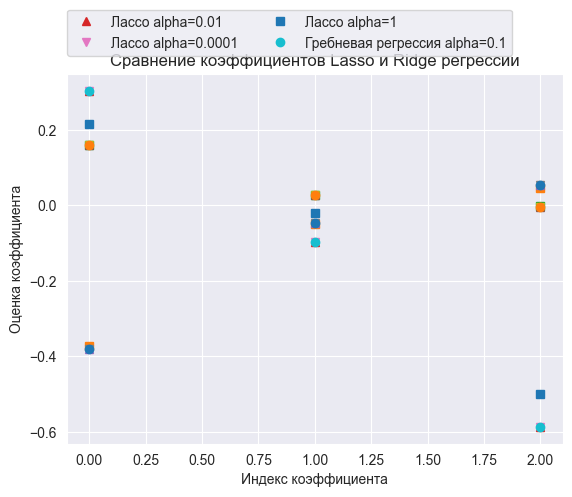

In [118]:
plt.plot(lasso.coef_, 's', label="Лассо alpha=1")
plt.plot(lasso001.coef_, '^', label="Лассо alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Лассо alpha=0.0001")
plt.plot(ridge001.coef_, 'o', label="Гребневая регрессия alpha=0.1")

handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]

plt.legend(unique_handles, unique_labels, ncol=2, loc=(0, 1.05))
plt.xlabel("Индекс коэффициента")
plt.ylabel("Оценка коэффициента")
plt.title("Сравнение коэффициентов Lasso и Ridge регрессии")
plt.show()
# я не уверен правильно ли здесь 😭😭😭

In [121]:
from sklearn.metrics import mean_squared_error
predictions = lasso.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Среднеквадратичная ошибка: {mse}")


Среднеквадратичная ошибка: 238.31879302418074
